# ENCO

## Packages

### Libraries

In [7]:
import sys
import os
import pandas as pd
import numpy as np
import time
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta

# For creating cool charts :)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib import image
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates
from highlight_text import ax_text


# We load pre-defined functions, fonts and stylesheet.
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import *

path = [x for x in sys.path if "utils" in x][0]

# Optional for TUKAN's mplstylesheet
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

In [23]:
# Spanish
import locale
locale.setlocale(locale.LC_ALL, 'es_es')

'es_es'

### Customized functions

In [2]:
# Filter dataframe by date range or for two specific dates
def date_selection(data_frame,first_date,last_date,inbewtween):
    if inbewtween==True:
        data_frame = data_frame[(data_frame["date"] >= first_date) & (data_frame["date"] <= last_date)].reset_index(drop = True)
    else:
        data_frame = data_frame[(data_frame["date"] == first_date) | (data_frame["date"] == last_date)].reset_index(drop = True)
    return(data_frame)

# Return last date for any dataframe with a 'date' columns
def last_date(dataframe):
    x= dataframe['date'].tail(1).dt.strftime('%Y-%m-%d').to_string()[-10:]
    return(x)

### Fonts

In [3]:
#n Load new fonts
# Load the Comfortaa style

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Teko\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Dosis\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

## Data

### Payload

In [4]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        ""
    ],
    "categories": {},
    "request": [
        {
            "table": "mex_inegi_enco_index",
            "variables": [
                "f789b42197d3c85"
            ]
        }
    ],
    "from": "2000-01-07"
}
response = get_tukan_api_request(payload)
data = response["data"]

Success getting the data


In [6]:
final_data = data.copy()
final_data["president"] = ["Zedillo" if x < datetime(2000,12,1) else "Fox" if x < datetime(2006,12,1) else "Calderón" if x < datetime(2012,12,1) else "Peña Nieto" if x < datetime(2018,12,1) else "AMLO" for x in final_data["date"]]
final_data
# data

,date,f789b42197d3c85,president
0,2001-04-01,46.629247,Fox
1,2001-05-01,45.186165,Fox
2,2001-06-01,44.568246,Fox
3,2001-07-01,46.874405,Fox
4,2001-08-01,47.693093,Fox
...,...,...,...
246,2021-10-01,43.843081,AMLO
247,2021-11-01,45.935432,AMLO
248,2021-12-01,44.896417,AMLO
249,2022-01-01,43.590904,AMLO


(-0.5, 190.5, 190.5, -0.5)

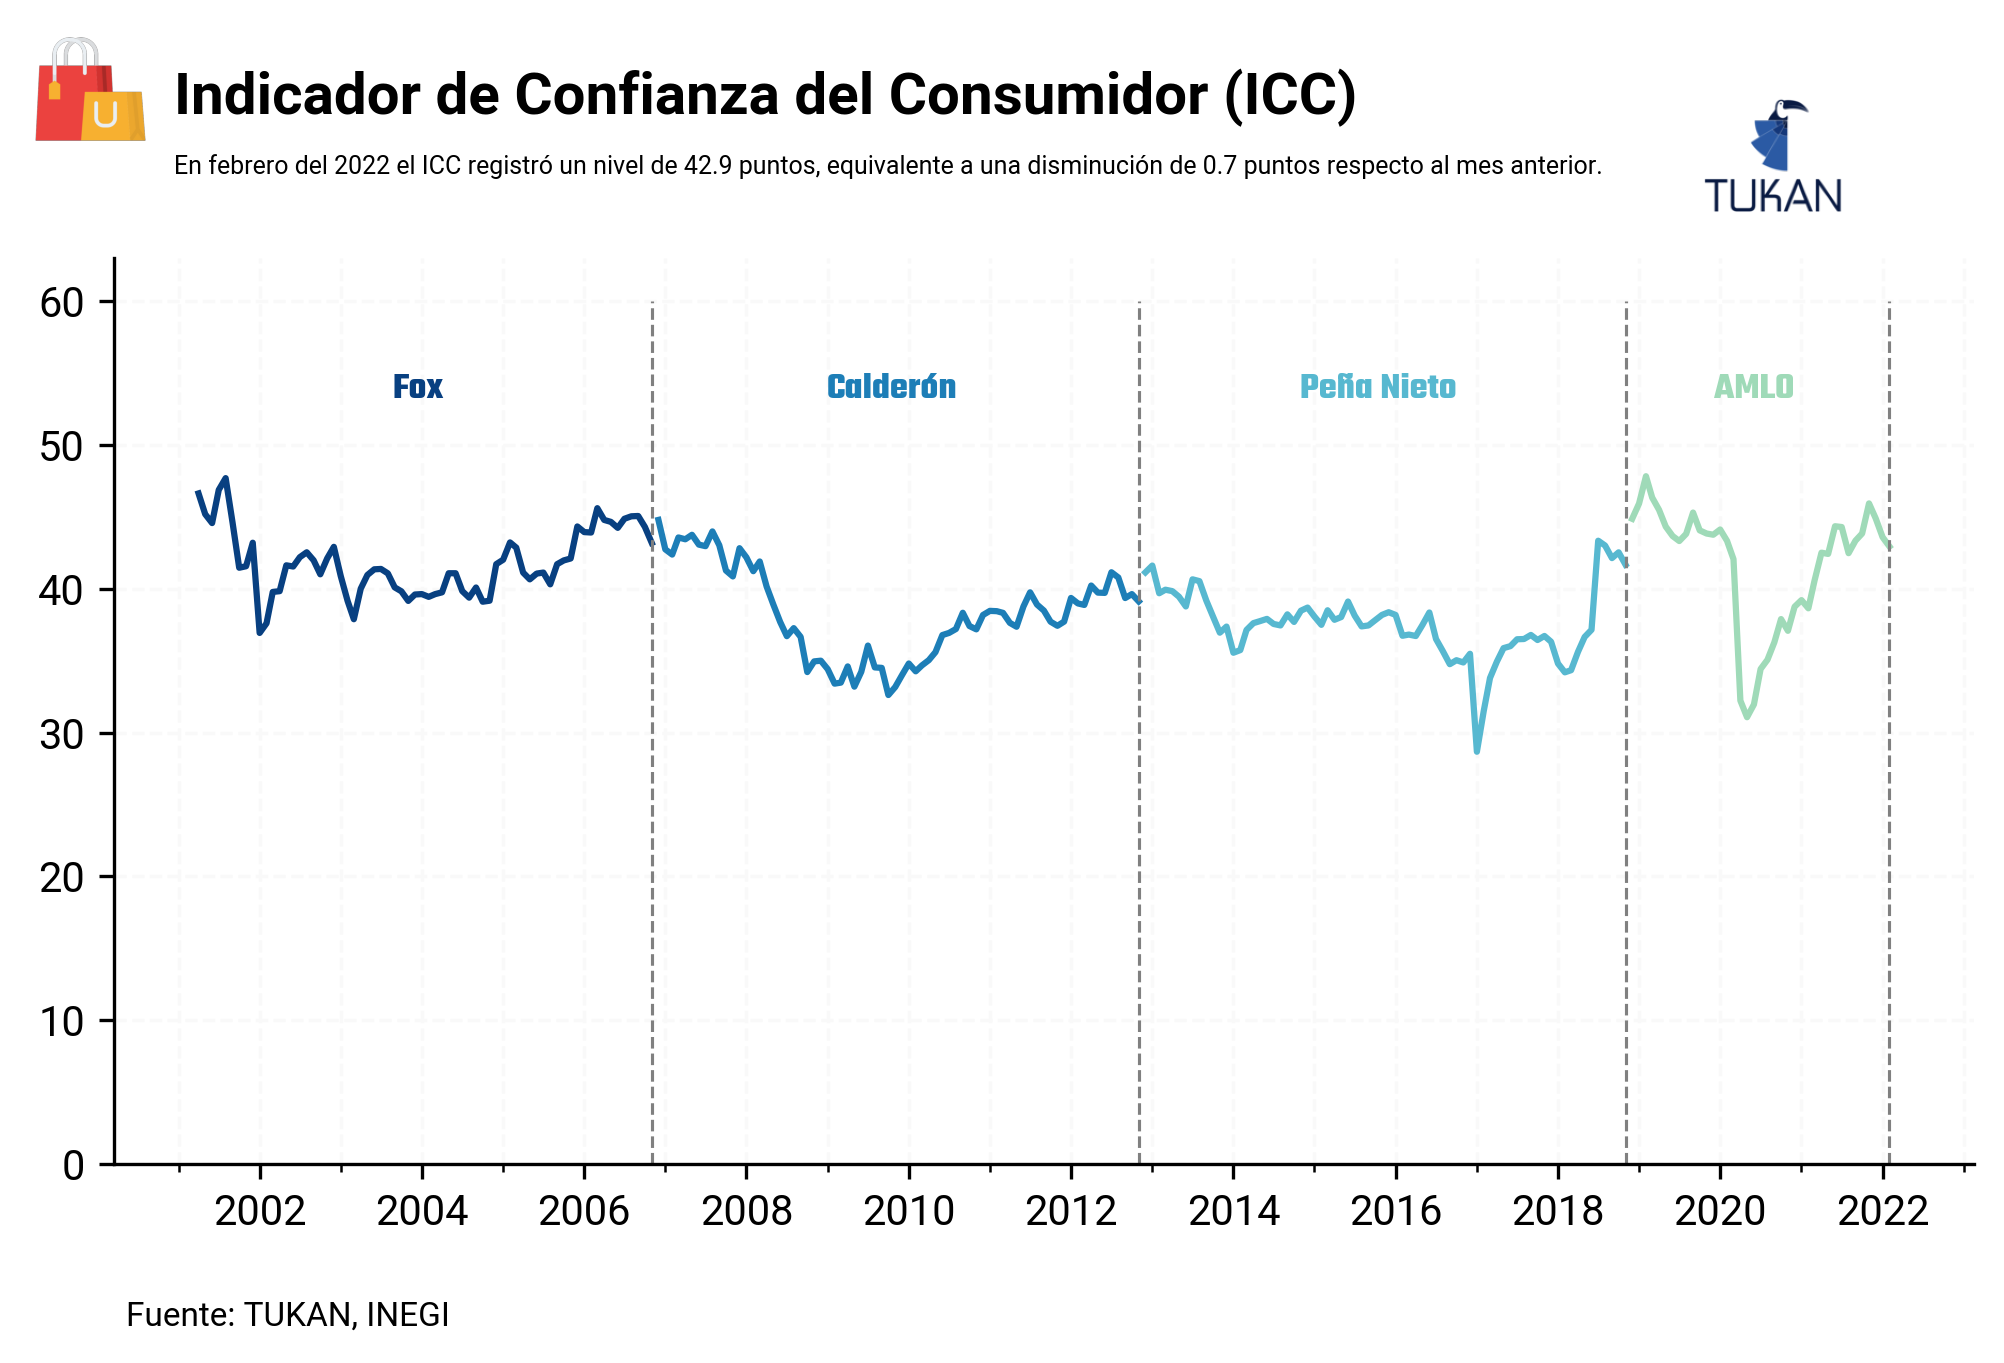

In [41]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

presidents = list(final_data["president"].unique())

cmap = mpl.cm.get_cmap("GnBu_r", len(presidents) + 2)

for index, x in enumerate(presidents):
    ax.plot(final_data[final_data["president"] == x]["date"], final_data[final_data["president"] == x]["f789b42197d3c85"], color = cmap(index))

    X_max = final_data[final_data["president"] == x]["date"].max()
    X_min = final_data[final_data["president"] == x]["date"].min()
    center_date = X_min + ((X_max - relativedelta(months=2)) - X_min)/2

    ax.vlines(X_max, ymin = 0, ymax = 60, color = "gray", ls = "--", lw = .75)
    ax_text(x = center_date, y = 55,
            s = f"<{x}>",
            highlight_textprops=[{"color": cmap(index)}], 
                                ax = ax, weight = "bold", font = "Teko", ha = "center", size = 9)


# ax.set_gid(color = "#dddddd")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#f9f9f9")

ax.set_ylim(0)

# Icon
icon_icon = image.imread("shopping.png")
icon_ax = fig.add_axes([0.09, .97, 0.05, 0.1], zorder=1)
icon_ax.imshow(icon_icon)
icon_ax.axis("off")

# Title and subtitle
last_month = final_data['date'].tail(1).dt.strftime("%B del %Y").values[0]
last_value = final_data['f789b42197d3c85'].tail(1).values[0].round(1)
second_to_last_value = final_data['f789b42197d3c85'].tail(2).values[0].round(1) 
change_value = last_value - second_to_last_value

if change_value > 0:
    var_value = 'un aumento'
else:
    var_value = 'una disminución'

fig.text(
    0.15,
    1,
    "Indicador de Confianza del Consumidor (ICC)",
    size=14,
    weight = "bold",
    font = "Roboto"
)
fig.text(
    0.15,
    0.95,
    f"En {last_month} el ICC registró un nivel de {last_value} puntos, equivalente a {var_value} de {abs(change_value.round(1))} puntos respecto al mes anterior.",
    size=6
)
# Add footer
fig.text(0.13, -0.01, "Fuente: TUKAN, INEGI", fontsize=8)

# Save plot with TUKAN logo, transparent and white
# plt.savefig(
#     "plots/icc_no_logo.svg",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.72, .88, 0.14, 0.17], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

# plt.savefig(
#     "plots/icc_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

# plt.savefig(
#     "plots/icc_white_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     facecolor="white",
#     edgecolor="none",
#     transparent=False,
# )